In [1]:
"""
chirp.py: Introduction to chirp
Author: Gal Winer - Quantum Machines
Created: 17/01/2021
Revised by Tomer Feld - Quantum Machines
Revision date: 04/04/2022
"""

from qm import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
import numpy as np
import matplotlib.pyplot as plt
from configuration import *

qop_ip = "132.66.210.26"
qmm = QuantumMachinesManager(host=qop_ip)


2025-11-03 15:22:26,145 - qm - INFO     - Starting session: fe4d3442-fa9f-4bcc-b720-a45ad44f3c54
2025-11-03 15:22:26,438 - qm - INFO     - Performing health check
2025-11-03 15:22:26,445 - qm - INFO     - Health check passed


2025-11-03 15:24:15,751 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(
/var/folders/qm/05mwj9v970vfpgxnf4rg8jr80000gn/T/ipykernel_77522/2382535643.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels((ax1.get_xticks() * 1e6).astype(int))
/var/folders/qm/05mwj9v970vfpgxnf4rg8jr80000gn/T/ipykernel_77522/2382535643.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels((ax1.get_yticks() / 1e6).astype(int))


Text(0, 0.5, 'f [MHz]')

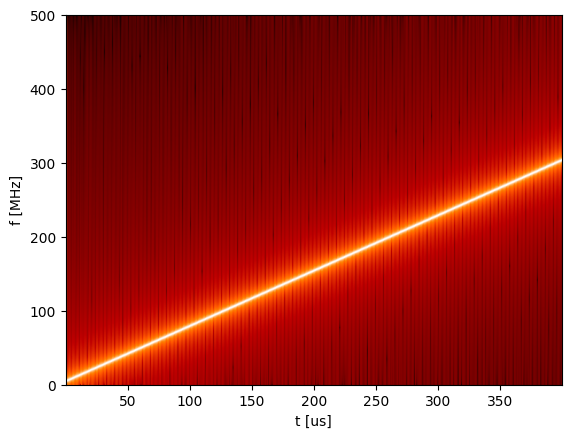

In [4]:
### First example - Linear chirp

rate = int(3e8 / pulse_duration)
units = "Hz/nsec"
with program() as prog:
    play("const", "qe1", chirp=(rate, units))

job = qmm.simulate(config, prog, SimulationConfig(int(pulse_duration // 4)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
x = samples.con1.analog["1"]
NFFT = 2**10
Fs = 1e9
ax1 = plt.subplot(111)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=100, cmap=plt.cm.gist_heat)
ax1.set_xticklabels((ax1.get_xticks() * 1e6).astype(int))
ax1.set_yticklabels((ax1.get_yticks() / 1e6).astype(int))
plt.xlabel("t [us]")
plt.ylabel("f [MHz]")



2025-11-03 15:23:09,810 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


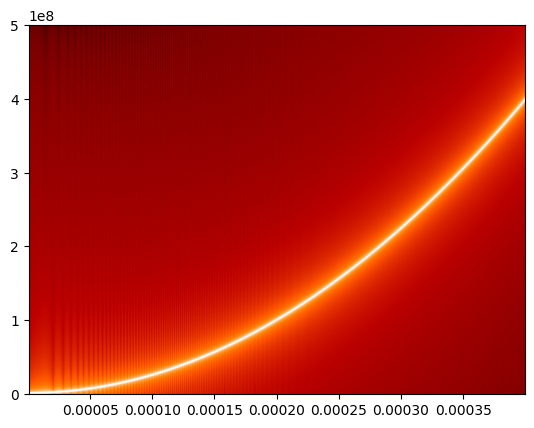

/var/folders/qm/05mwj9v970vfpgxnf4rg8jr80000gn/T/ipykernel_77522/4028114896.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels((ax1.get_xticks() * 1e6).astype(int))
/var/folders/qm/05mwj9v970vfpgxnf4rg8jr80000gn/T/ipykernel_77522/4028114896.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels((ax1.get_yticks() / 1e6).astype(int))


Text(0, 0.5, 'f [MHz]')

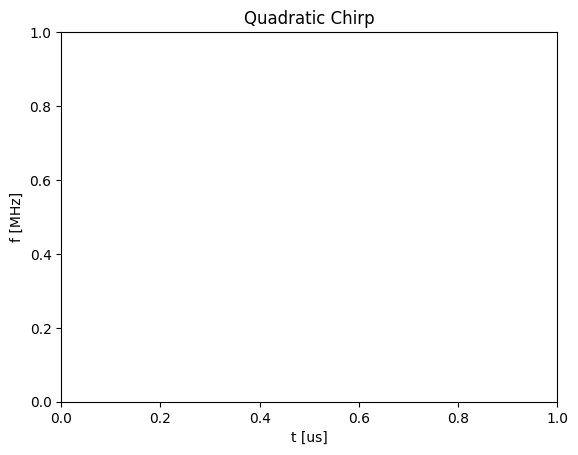

In [ ]:

### Second example: Piecewise linear chirp to form a quadratic chirp

f_start = 1e6
f_end = 4e8
n_segs = 40
dt = pulse_duration / n_segs

a = (f_end - f_start) / (pulse_duration) ** 2

time_vec = dt * np.array(range(n_segs + 1))
freq_vec = a * time_vec**2 + f_start
rates = (np.diff(freq_vec) / (pulse_duration / n_segs)).astype(int).tolist()
units = "Hz/nsec"
with program() as prog:
    update_frequency("qe1", f_start)
    play("const", "qe1", chirp=(rates, units))

job = qmm.simulate(config, prog, SimulationConfig(int(pulse_duration // 4)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()

x = samples.con1.analog["1"]
NFFT = 2**10
Fs = 1e9
plt.figure()
ax1 = plt.subplot(111)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=1000, cmap=plt.cm.gist_heat)
ax1.set_xticklabels((ax1.get_xticks() * 1e6).astype(int))
ax1.set_yticklabels((ax1.get_yticks() / 1e6).astype(int))
plt.title("Quadratic Chirp")
plt.xlabel("t [us]")
plt.ylabel("f [MHz]")
